In [1]:
import sys
sys.path.insert(0, 'src/')
from data_preprocessing import *
import pickle

In [2]:
sd = pd.read_csv('ca_san_diego_2020_04_01.csv')

In [6]:
sd['subject_race'].value_counts(normalize=True)

white                     0.424906
hispanic                  0.306666
black                     0.111854
asian/pacific islander    0.085232
other                     0.071342
Name: subject_race, dtype: float64

In [238]:
res_lst = []
ob = 0.9
ob_pct = int(ob*100)
version = 4
# extra_str = '_v{version}.'
extra_str = '_fruitful_no_salient'
with open(f'model_results/model_36months_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    svm_dict = pickle.load(f)
#     print(pd.Series(svm))
with open(f'model_results/X_tests_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    X_tests = pickle.load(f)
with open(f'model_results/y_tests_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    y_tests = pickle.load(f)
with open(f'model_results/X_filts_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    X_filts = pickle.load(f)

In [239]:
    
for t in range(36):
    data_filt = X_filts[t]

In [240]:
t = 1
first_month = X_filts[t] 
first_month['search_conducted'].sum()/len(first_month)

0.7768123459992219

In [241]:
first_month.groupby('subject_race').agg({'fruitful_search':['sum', 'count']})

fruitful_search      
                                   sum count
subject_race                                
asian/pacific islander             397   709
black                              592   973
hispanic                          1660  2410
other                              300   460
white                             1899  3144

In [242]:
(first_month['contraband_found'].sum())

54

In [243]:
t = 35
last_month = X_filts[t] 
last_month['search_conducted'].sum()/len(last_month)

0.7890031291908807

In [244]:
last_month.groupby('subject_race').agg({'fruitful_search':['sum', 'count']})

fruitful_search      
                                   sum count
subject_race                                
asian/pacific islander             101   152
black                              237   363
hispanic                           464   720
other                              145   188
white                              500   808

In [245]:
X_filts[1]

,raw_row_number,date,time,division,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,div_num,fruitful_search,year,total_pop,pred_fruitful_search
19702,20912,2014-02-15,04:30:00,CENTRAL,33.0,white,male,vehicular,True,True,...,other,-h Waiver Search|Search Incident To Arrest|Evi...,"UNI, &County, H&&S Code",Citation,WHITE,5,True,2014,152970,True
13386,14231,2014-02-03,21:10:00,CENTRAL,25.0,white,male,vehicular,False,False,...,NaN,NaN,Moving Violation,Written Warning,WHITE,5,False,2014,152970,True
19273,20444,2014-02-14,11:50:00,CENTRAL,34.0,hispanic,male,vehicular,False,False,...,NaN,NaN,Equipment Violation,Written Warning,HISPANIC,5,False,2014,152970,True
16030,17023,2014-02-08,02:35:00,CENTRAL,25.0,black,male,vehicular,False,False,...,NaN,NaN,Equipment Violation,Verbal Warning,BLACK,5,True,2014,152970,True
22516,23882,2014-02-20,17:52:00,CENTRAL,21.0,hispanic,male,vehicular,False,NaN,...,NaN,NaN,Equipment Violation,NaN,HISPANIC,5,False,2014,152970,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19481,20673,2014-02-14,20:45:00,WESTERN,53.0,hispanic,female,vehicular,False,False,...,NaN,NaN,Moving Violation,Verbal Warning,HISPANIC,6,False,2014,144302,False
18595,19726|19727,2014-02-13,08:20:00,WESTERN,56.0,white,female,vehicular,False,False,...,NaN,NaN,Moving Violation,Written Warning,WHITE,6,False,2014,144302,False
13150,13981,2014-02-03,12:41:00,WESTERN,47.0,white,female,vehicular,False,False,...,NaN,NaN,Moving Violation,Written Warning,WHITE,6,False,2014,144302,False
19654,20850,2014-02-15,00:30:00,WESTERN,21.0,hispanic,male,vehicular,False,True,...,NaN,NaN,Moving Violation,Citation,HISPANIC,6,True,2014,144302,True


In [246]:
month

,raw_row_number,date,time,division,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,div_num,fruitful_search,year,total_pop,pred_fruitful_search
341557,360175,2016-12-20,14:12:00,CENTRAL,21.0,other,female,vehicular,False,False,...,NaN,NaN,Moving Violation,Written Warning,OTHER,5,False,2016,156673,True
343627,362340,2016-12-30,20:10:00,CENTRAL,21.0,white,male,vehicular,False,False,...,NaN,NaN,Moving Violation,Verbal Warning,WHITE,5,True,2016,156673,True
342371,361026,2016-12-23,18:49:00,CENTRAL,31.0,hispanic,male,vehicular,False,True,...,NaN,NaN,Equipment Violation,Citation,HISPANIC,5,True,2016,156673,True
341475,360091,2016-12-20,11:30:00,CENTRAL,43.0,hispanic,male,vehicular,False,False,...,NaN,NaN,Equipment Violation,Verbal Warning,HISPANIC,5,False,2016,156673,False
342415,361071,2016-12-23,22:00:00,CENTRAL,22.0,black,male,vehicular,False,False,...,NaN,NaN,Moving Violation,Written Warning,BLACK,5,True,2016,156673,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338506,357018,2016-12-08,20:06:00,WESTERN,25.0,white,male,vehicular,NaN,True,...,NaN,NaN,Moving Violation,Citation,WHITE,6,True,2016,147891,True
339163,357688,2016-12-11,14:45:00,WESTERN,29.0,NaN,male,vehicular,False,True,...,NaN,NaN,Moving Violation,Citation,NaN,6,True,2016,147891,True
339760,358316,2016-12-13,16:53:00,WESTERN,25.0,black,male,vehicular,False,True,...,NaN,NaN,Equipment Violation,Citation,BLACK,6,True,2016,147891,True
341924,360570,2016-12-21,16:30:00,WESTERN,24.0,white,female,vehicular,NaN,False,...,NaN,NaN,Moving Violation,Written Warning,WHITE,6,True,2016,147891,True


In [247]:
sd['date'] = sd['date'].astype('datetime64')

In [248]:
stops_by_race = {}
for t in range(35):
    if t == 0:
        month = sd[(sd['date'].dt.month==1) & (sd['date'].dt.year==2014)]
        stops_by_race[t] = month['subject_race'].value_counts(normalize=True).to_dict()
    month = X_filts[t+1]
    stops_by_race[t] = month['subject_race'].value_counts(normalize=True).to_dict()

In [249]:
import seaborn as sns

In [250]:
race_stop_data = pd.DataFrame(stops_by_race).T

In [251]:
# race_stop_ro

In [252]:
race_stop_roll = race_stop_data.rolling(5, min_periods=1).mean()
race_sns_roll = pd.concat([race_stop_roll[i] for i in race_stop_roll.columns], axis=0).to_frame()
race_lst = [[i]*35 for i in race_stop_roll.columns]
race_sns_roll['race'] = [r for race in race_lst for r in race]
race_sns_roll = race_sns_roll.rename(columns={0:'prop'}).reset_index()

In [253]:
race_sns_roll

,index,prop,race
0,0,0.408524,white
1,1,0.413204,white
2,2,0.414202,white
3,3,0.408744,white
4,4,0.404072,white
...,...,...,...
170,30,0.069246,other
171,31,0.069900,other
172,32,0.067668,other
173,33,0.069231,other


In [254]:
def get_plottable_race_df(race_df):
    race_sns = pd.concat([race_df[i] for i in race_df.columns], axis=0).to_frame()
    race_lst = [[i]*35 for i in race_df.columns]
    race_sns['race'] = [r for race in race_lst for r in race]
    race_sns = race_df.rename(columns={0:'prop'}).reset_index()
    return race_sns

In [255]:
# get_plottable_race_df(race_stop_roll.T)

In [256]:
race_sns = pd.concat([race_stop_data[i] for i in race_stop_data.columns], axis=0).to_frame()
race_lst = [[i]*35 for i in race_stop_data.columns]
race_sns['race'] = [r for race in race_lst for r in race]
race_sns = race_sns.rename(columns={0:'prop'}).reset_index()

In [257]:
import matplotlib.pyplot as plt

In [258]:
# race_rollAvg = race_sns.copy()
# race_rollAvg['prop'] = race_sns['prop'].rolling(3, min_periods=0).mean()
# # race_rollAvg['race'] = race_sns.race

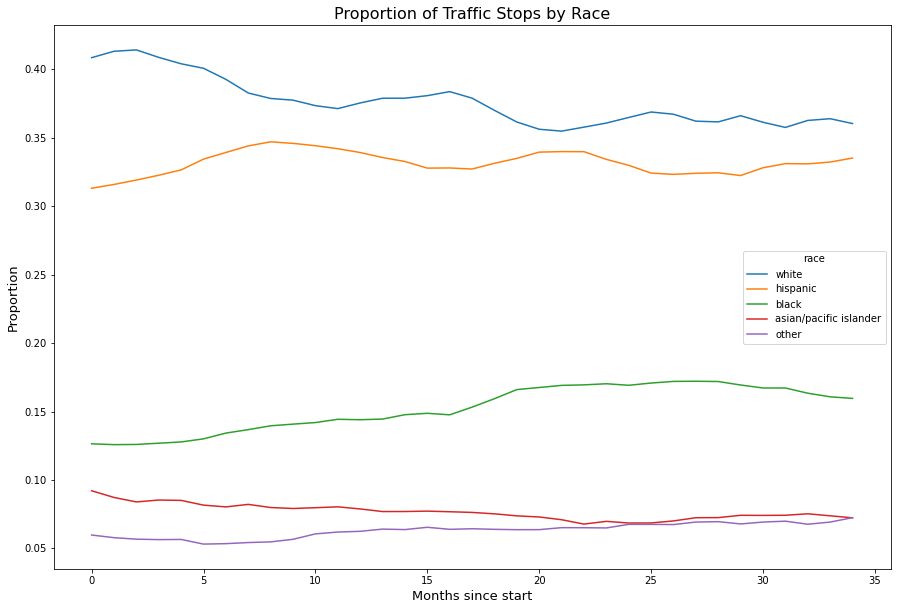

In [259]:
plt.figure(figsize=(15, 10))
plt.title('Proportion of Traffic Stops by Race', fontsize=16)
plt.xlabel('Months since start', fontsize=13)
plt.ylabel('Proportion', fontsize=13)
sns.lineplot(data=race_sns_roll, x='index', y='prop', hue='race');
plt.savefig(f'figures/prop_traffic_stops_by_race_roll_5_{extra_str}_ob_{ob_pct}.png', dpi=900, bbox_inches='tight')

In [260]:
# race_rollAvg[race_rollAvg['race']=='black']

<AxesSubplot:xlabel='index', ylabel='prop'>

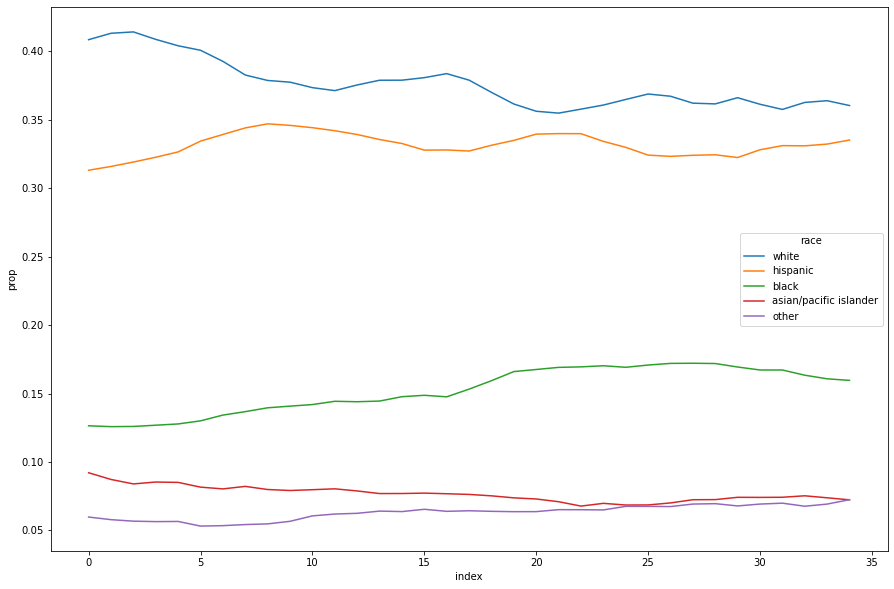

In [261]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=race_sns_roll, x='index', y='prop', hue='race')

In [45]:
first_month['subject_race'].value_counts(normalize=True)

white                     0.391197
hispanic                  0.329200
black                     0.141971
asian/pacific islander    0.093201
other                     0.044431
Name: subject_race, dtype: float64

In [47]:
last_month['subject_race'].value_counts(normalize=True)#(len)#:['sum', 'count']})

hispanic                  0.426367
black                     0.295933
white                     0.185133
asian/pacific islander    0.065919
other                     0.026648
Name: subject_race, dtype: float64

In [48]:
last_month

,raw_row_number,date,time,division,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,div_num,fruitful_search,year,total_pop,pred_fruitful_search
343721,362438,2016-12-31,17:57:00,MIDCITY,38.0,hispanic,female,vehicular,False,True,...,NaN,NaN,Equipment Violation,Citation,HISPANIC,8,True,2016,145208,True
341001,359603,2016-12-19,02:50:00,MIDCITY,19.0,white,male,vehicular,False,False,...,NaN,NaN,Moving Violation,Verbal Warning,WHITE,8,True,2016,145208,True
337441,355909,2016-12-05,11:37:00,MIDCITY,55.0,hispanic,female,vehicular,NaN,NaN,...,NaN,NaN,Equipment Violation,NaN,HISPANIC,8,False,2016,145208,False
337861,356356,2016-12-06,18:04:00,MIDCITY,30.0,white,female,vehicular,False,False,...,NaN,NaN,Equipment Violation,Verbal Warning,WHITE,8,False,2016,145208,False
336776,355219,2016-12-02,01:25:00,MIDCITY,21.0,white,female,vehicular,False,True,...,NaN,NaN,Moving Violation,Citation,WHITE,8,True,2016,145208,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341821,360457,2016-12-21,10:35:00,SOUTHEASTERN,21.0,hispanic,male,vehicular,False,True,...,NaN,NaN,Moving Violation,Citation,HISPANIC,4,True,2016,137994,True
340448,359025,2016-12-15,18:10:00,SOUTHEASTERN,46.0,black,male,vehicular,False,True,...,other,-th Waiver Search,Equipment Violation,Citation,BLACK,4,True,2016,137994,True
343384,362088,2016-12-29,11:25:00,SOUTHEASTERN,45.0,black,male,vehicular,False,True,...,NaN,NaN,Moving Violation,Citation,BLACK,4,True,2016,137994,True
340089,358656,2016-12-14,19:12:00,SOUTHEASTERN,21.0,hispanic,male,vehicular,False,True,...,other,Inventory Search [Prior to Impound],Moving Violation,Citation,HISPANIC,4,True,2016,137994,True
